In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

import xgboost as xgb

pd.set_option("display.max_columns", 101)

In [39]:
first_product = pd.read_pickle("./HOBBIES_1_001_feature.pkl")
first_product.tail()

,store_id,day_number,units_sold,sell_price,snap,units_lag_28,mean_rolling_7,mean_rolling_28,mean_rolling_49,mean_rolling_84,mean_rolling_140,std_rolling_7,std_rolling_28,std_rolling_49,std_rolling_84,std_rolling_140,std_price_rolling_7,std_price_rolling_28,price_percent_change,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,store_id_CA_1,store_id_CA_2,store_id_CA_3,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious
9685,TX_2,1941,NaN,8.257812,0,0.0,0.142822,0.285645,0.306152,0.357178,0.478516,0.377930,0.534668,0.651855,0.845215,0.826660,0.000000e+00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9686,TX_3,1941,NaN,8.257812,0,0.0,0.000000,0.321533,0.408203,0.440430,0.528809,0.000000,0.669434,0.733887,0.717285,0.834961,5.960464e-08,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9687,WI_1,1941,NaN,8.382812,0,1.0,0.714355,0.392822,0.408203,0.464355,0.435791,0.755859,0.628906,0.643066,0.767578,0.750977,0.000000e+00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9688,WI_2,1941,NaN,8.382812,0,1.0,0.142822,0.250000,0.163208,0.095215,0.085693,0.377930,0.440918,0.373535,0.295410,0.305420,0.000000e+00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9689,WI_3,1941,NaN,8.382812,0,0.0,0.000000,0.107117,0.163208,0.214233,0.214233,0.000000,0.314941,0.373535,0.440918,0.476562,0.000000e+00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
first_product_train = first_product[first_product.day_number.astype(int) <= 1885].reset_index(drop=True) # 1913-28
first_product_validation = first_product[(first_product.day_number.astype(int) > 1885)
                                         & (first_product.day_number.astype(int) < 1914)].reset_index(drop=True)
first_product_test = first_product[first_product.day_number.astype(int) >= 1914].reset_index(drop=True)

first_product_train_x = first_product_train.iloc[:, 3:]
first_product_train_y = first_product_train.units_sold
first_product_validation_x = first_product_validation.iloc[:, 3:]
first_product_validation_y = first_product_validation.units_sold

first_product_test_x = first_product_test.iloc[:, 3:]

In [62]:
len(first_product_validation)

280

## XGBoost

In [74]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [75]:
model.fit(first_product_train_x, first_product_train_y)

/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=None, subsample=0.6, verbosity=1)

In [76]:
xgb_preds = np.round(model.predict(first_product_validation_x))
xgb_preds

array([1., 1., 2., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0.

In [77]:
np.sqrt(mean_squared_error(first_product_validation_y.values, xgb_preds))

0.8493695

Text(0, 0.5, 'Feature Importance Score')

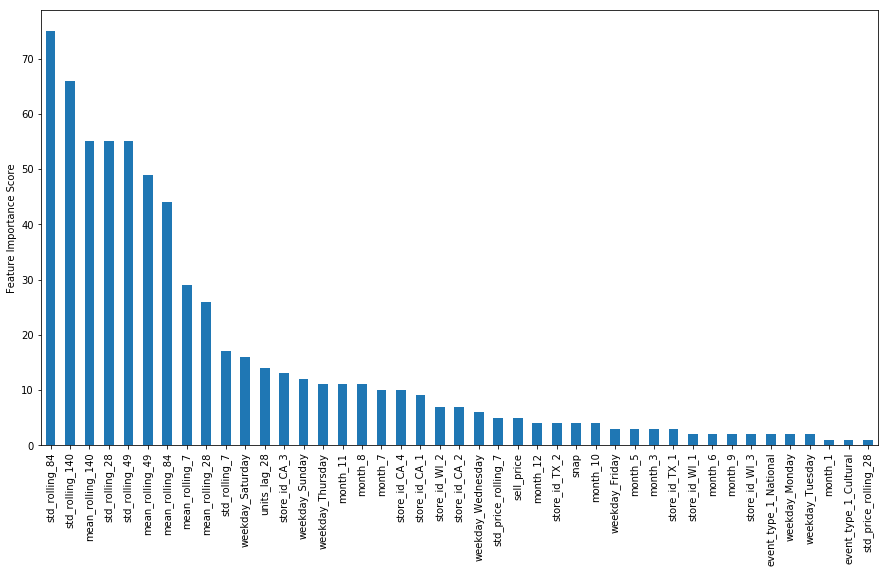

In [45]:
feature_importances = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
plt.figure(figsize=(15, 8))
feature_importances.plot(kind='bar')

plt.ylabel('Feature Importance Score')

In [46]:
# colsample_bytree=0.4, gamma=0,learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100,                                                                    
# reg_alpha=0.75, reg_lambda=0.45, subsample=0.6

### Tuning reg_alpha and reg_lambda

In [79]:
# We need to take days before 1914 as days after 1914 contain NaN units sold for the days we will forecast
first_product_x = first_product[first_product.day_number.astype(int) < 1914].iloc[:, 3:]
first_product_y = first_product[first_product.day_number.astype(int) < 1914].units_sold

# tscv = TimeSeriesSplit(n_splits=10)
# grid_search = GridSearchCV(clf, param_grid, cv=tscv.split(X))

# Need to define cv parameter separately because we need to specify split mechanism
# because time series split cannot just be split randomly
# for each split, validation indices have to be greater than train indices

# tscv.split(first_product_train_x) => internally creates validation sets from first_product_train_x

reg_params = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 0.75, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 0.45, 0.75, 1],
    
}
reg_gsearch = GridSearchCV(estimator = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42), 
             param_grid = reg_params, scoring='neg_mean_squared_error', n_jobs=4, iid=False,
             cv=tscv.split(first_product_x))
reg_gsearch.fit(first_product_x, first_product_y)
reg_gsearch.best_params_, reg_gsearch.best_score_

/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:20:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'reg_alpha': 1, 'reg_lambda': 0.75}, -0.5296396762132645)

In [80]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=1,
                 reg_lambda=0.75,
                 subsample=0.6,
                 seed=42)
model.fit(first_product_train_x, first_product_train_y)
xgb_preds = np.round(model.predict(first_product_validation_x))
np.sqrt(mean_squared_error(first_product_validation_y.values, xgb_preds))

[17:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.85981727

We notice that after tuning teh reg_alpha and reg_lambda values, the error is slightly higher than the previous error with the untuned values, which is unexpected. This could be because grid search has a larger validation set so the best score is evaluated on a larger set, which could result in a smaller best score for the grid search.

### Tuning max_depth

In [92]:
reg_params = {
 'max_depth': range(3,10,2)
    
}
reg_gsearch = GridSearchCV(estimator = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=1,
                 reg_lambda=0.75,
                 subsample=0.6,
                 seed=42), 
             param_grid = reg_params, scoring='neg_mean_squared_error', n_jobs=4, iid=False,
             cv=tscv.split(first_product_x))
reg_gsearch.fit(first_product_x, first_product_y)
reg_gsearch.best_params_, reg_gsearch.best_score_

/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'max_depth': 3}, -0.5296396762132645)

In [91]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=2,
                 n_estimators=100,                                                                    
                 reg_alpha=1,
                 reg_lambda=0.75,
                 subsample=0.6,
                 seed=42)
model.fit(first_product_train_x, first_product_train_y)
xgb_preds = np.round(model.predict(first_product_validation_x))
np.sqrt(mean_squared_error(first_product_validation_y.values, xgb_preds))

/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:32:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.85981727

### Tuning  subsample and colsample_bytree

In [112]:
reg_params = {
    'subsample':[i/10.0 for i in range(0,10)],
    'colsample_bytree':[i/10.0 for i in range(0,10)]
}
reg_gsearch = GridSearchCV(estimator = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=2,
                 n_estimators=100,                                                                    
                 reg_alpha=1,
                 reg_lambda=0.75,
                 subsample=0.6,
                 seed=42), 
             param_grid = reg_params, scoring='neg_mean_squared_error', n_jobs=4, iid=False,
             cv=tscv.split(first_product_x))
reg_gsearch.fit(first_product_x, first_product_y)
reg_gsearch.best_params_, reg_gsearch.best_score_

/home/asif/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:41:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.1, 'subsample': 0.6}, -0.5235318779945374)

In [111]:
model = xgb.XGBRegressor(colsample_bytree=0.1,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=2,
                 n_estimators=100,                                                                    
                 reg_alpha=1,
                 reg_lambda=0.75,
                 subsample=0.6,
                 seed=42)
model.fit(first_product_train_x, first_product_train_y)
xgb_preds = np.round(model.predict(first_product_validation_x))
np.sqrt(mean_squared_error(first_product_validation_y.values, xgb_preds))

/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/asif/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8451543